注释数据分析

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

import ast
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# # 下载必要的资源，下载过了这里注释掉
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')

In [46]:
# 读数据
def get_comment_and_attribute():
    comment_word_list = []
    attribute_list = []
    
    with open('D:/BERT_learing/CCDP/gcb/Linelevel/comment_attribute_true.txt', 'r') as f:
        # 直接读txt  之后的 lines 的类型是 str  需要把str 变为 list
        lines = f.readlines()
        
        for i in range(0, len(lines), 2):
#             print(type(lines[i].strip())) # str
            # str  ->  list
            w_list = ast.literal_eval(lines[i].strip())
            comment_word_list.append(w_list)
#             print(type(w_list))          # list
            
            w_list = ast.literal_eval(lines[i+1].strip())
            attribute_list.append(w_list)
            
    return comment_word_list,attribute_list

comment_word_list,attribute_list = get_comment_and_attribute()

In [47]:
# true comment lenth
len(comment_word_list)

2174

In [48]:
# 把词恢复成句子 ， 对比一下  恢复成句子 和 不恢复成句子 有什么区别
def restore_CommentWord2Sentence(comment_WordList):
    comment_sentence = []
    for comment_number in comment_WordList:

        # 将列表内的 一个个单词 组合成 句子 
        sentence = ' '.join(comment_number)
        # 去除句子中多余的空格
        sentence = sentence.replace(' .', '.')
        comment_sentence.append(sentence)
        
    return comment_sentence

comment_sentence = restore_CommentWord2Sentence(comment_word_list)

In [49]:
# 用的 word_tokenize(sentence) 分词，  使用上述的 comment_sentence
def get_WordTagging_attribution_for_sentence(comment_sentence_list):
    tagged_sentence_list = []
    for sentence in comment_sentence_list:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        tagged_sentence_list.append(tagged_words)
        
    return tagged_sentence_list
tagged_sentence_list = get_WordTagging_attribution_for_sentence(comment_sentence)

In [50]:
# 读数据之后直接用， 不是用的word_tokenize(sentence)分词，与get_WordTagging_attribution_for_sentence对比结果
def get_WordTagging_attribution_for_word(comment_list):
    tagged_words_list = []
    for tag in comment_list:
        tagged_words = pos_tag(tag)
        tagged_words_list.append(tagged_words)
    
#     # 过滤掉标点符号 , 可以不过滤
#     filtered_tagged_words\
#     = [word for word in tagged_words\
#        if word[1] not in ['.', ',', ';', ':', '(', ')', '[', ']', '{', '}', '!', '?', '``', "''"]]
    return tagged_words_list

tagged_words_list = get_WordTagging_attribution_for_word(comment_word_list)

测试函数

In [51]:
# 使用这个对比下面两种情况 用 3 或 8 试试
comment_word_list[3]

['This', 'method', 'initializes', 'txtPattern']

In [52]:
tagged_sentence_list[3]

[('This', 'DT'),
 ('method', 'NN'),
 ('initializes', 'VBZ'),
 ('txtPattern', 'JJ')]

In [53]:
tagged_words_list[3]

[('This', 'DT'),
 ('method', 'NN'),
 ('initializes', 'VBZ'),
 ('txtPattern', 'JJ')]

In [54]:
comment_word_list[3]

['This', 'method', 'initializes', 'txtPattern']

In [55]:
tagged_sentence_list[8]

[('Loads', 'NNP'),
 ('item', 'NN'),
 ('sprite', 'NN'),
 ('from', 'IN'),
 ('game', 'NN'),
 (',', ','),
 ('makes', 'VBZ'),
 ('transparent', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('generates', 'VBZ'),
 ('image', 'NN')]

In [56]:
tagged_words_list[8]

[('Loads', 'NNP'),
 ('item', 'NN'),
 ('sprite', 'NN'),
 ('from', 'IN'),
 ('game', 'NN'),
 (',', ','),
 ('makes', 'VBZ'),
 ('transparent', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('generates', 'VBZ'),
 ('image', 'NN')]

In [57]:
len(tagged_words_list[8])

12

In [58]:
len(attribute_list[8])

12

测试结束

In [59]:
# 返回列表，列表内元素为元组，元组（comment_token , tagging , attribution）
def get_commentToken_tagging_attribution(tagged_token_list,attribute_num_list):
    commentToken_tagging_attribution = []
    for token, attribute in zip(tagged_token_list,attribute_num_list) :
        updated_tagged_words = [(word, tag, attr) for (word, tag), attr in zip(token, attribute)]
        commentToken_tagging_attribution.append(updated_tagged_words)
    return commentToken_tagging_attribution

commentToken_tagging_attribution = get_commentToken_tagging_attribution(tagged_words_list,attribute_list)

In [60]:
commentToken_tagging_attribution[8]

[('Loads', 'NNP', -0.3374812616174032),
 ('item', 'NN', 0.09563627469060948),
 ('sprite', 'NN', 0.15674330689985644),
 ('from', 'IN', -0.13296453541662942),
 ('game', 'NN', -0.17974263799408102),
 (',', ',', -0.049185060325891386),
 ('makes', 'VBZ', -0.007614224285594679),
 ('transparent', 'NN', -0.04246230331522528),
 (',', ',', -0.03074498924011617),
 ('and', 'CC', -0.023131830499949272),
 ('generates', 'VBZ', -0.15791718734001495),
 ('image', 'NN', 0.022945581891508936)]

In [61]:
from collections import Counter

def static_tagging_type(data):
    punctuations = {'.', ',', ';', ':', '(', ')', '[', ']', '{', '}', '!', '?', '``', "''"}

    second_elements = [tag for sentence in data for _, tag, _ in sentence]

    # 统计词性出现的次数
    counter = Counter(second_elements)
    counter_list = list(counter.items()) 
    counter_list_new = [ele for ele in counter_list if ele[0] not in punctuations]
    
    
    # 把子类别归类 ：例如 NN  NNS 为一大类都是名词
    # 定义词性标签集合: 名词  动词  形容词 副词 连词 限定词 代词
    tag_groups = {
        'noun': {'NN', 'NNS', 'NNP', 'NNPS'},
        'verb': {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'},
        'adjective': {'JJ', 'JJR', 'JJS'},
        'adverb': {'RB', 'RBR', 'RBS'},
        'conjunction': {'CC', 'IN'},
        'determiner': {'DT', 'PDT', 'WDT'},
        'pronoun': {'PRP', 'PRP$', 'WP', 'WP$'}
    }
    pos_counts = {key: 0 for key in tag_groups}

    # 进行类别求和操作并处理未分类词性
    unclassified_tags = [(tag, count) for tag, count in counter_list_new if not any(tag in group for group in tag_groups.values())]
    for tag, count in counter_list_new:
        for group, tags in tag_groups.items():
            if tag in tags:
                pos_counts[group] += count

    # 将未分类词性加入到最终结果列表中
    final_result = list(pos_counts.items()) + unclassified_tags

    
    # 按照出现次数逆序排序
    sorted_data = sorted(final_result, key=lambda x: x[1], reverse=True)

    return sorted_data

counter_tagging_type = static_tagging_type(commentToken_tagging_attribution)

In [62]:
counter_tagging_type

[('noun', 8722),
 ('verb', 3464),
 ('determiner', 3152),
 ('adjective', 3116),
 ('conjunction', 2559),
 ('adverb', 471),
 ('TO', 390),
 ('MD', 198),
 ('CD', 197),
 ('pronoun', 132),
 ('#', 85),
 ('WRB', 29),
 ('POS', 23),
 ('EX', 21),
 ('RP', 16),
 ('SYM', 12),
 ('FW', 7),
 ('UH', 2),
 ('$', 1)]

In [63]:
# 这个函数需要修改

# 取  出现次数最多  并且是  句子主成分  的词性
# 暂定的  出现次数最多的前10个   句子主成分 还需调整
def filter_tagging_type(tagging_list):
    # 主要词性：名词，代词，动词，形容词，副词，介词短语
    main_type = ['NN','PRP','VB','JJ','RB','IN']
    tagging_list_top10 = tagging_list[:10]
    tagging_list_other = tagging_list[10:]
    tagging_list_main = [ele for ele in tagging_list_other if ele[0] in main_type]
    tagging_list_final = tagging_list_top10 + tagging_list_main
    
    return tagging_list_final

counter_tagging_type_filter = filter_tagging_type(counter_tagging_type)

In [64]:
counter_tagging_type_filter,len(counter_tagging_type_filter)

([('noun', 8722),
  ('verb', 3464),
  ('determiner', 3152),
  ('adjective', 3116),
  ('conjunction', 2559),
  ('adverb', 471),
  ('TO', 390),
  ('MD', 198),
  ('CD', 197),
  ('pronoun', 132)],
 10)

In [65]:
commentToken_tagging_attribution[0]

[('Check', 'NNP', 0.9857011926991499),
 ('whether', 'IN', 0.033321371454618366),
 ('any', 'DT', -0.0034110522250396336),
 ('insertion', 'NN', -0.015687103049881652),
 ('or', 'CC', 0.010197712131865502),
 ('deletion', 'NN', 0.024189839103679365),
 ('actions', 'NNS', 0.018128423437845657),
 ('are', 'VBP', 0.11349334193586948),
 ('currently', 'RB', 0.038613740849099444),
 ('queued', 'VBN', 0.023074095587449897),
 ('.', '.', 0.08589196558480994)]

In [66]:
def get_tagging_type_attribution(filter_tagging,token_tagging_attribution):
    filter_type = [ele[0] for ele in filter_tagging]
    
    # 定义词性标签集合: 名词  动词  形容词 副词 连词 限定词 代词
    tag_groups = {
        'noun': {'NN', 'NNS', 'NNP', 'NNPS'},
        'verb': {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'},
        'adjective': {'JJ', 'JJR', 'JJS'},
        'adverb': {'RB', 'RBR', 'RBS'},
        'conjunction': {'CC', 'IN'},
        'determiner': {'DT', 'PDT', 'WDT'},
        'pronoun': {'PRP', 'PRP$', 'WP', 'WP$'}
    }
    
    # 根据字典映射，将子类别改为父类别
    mapping = {tag: key for key, tags in tag_groups.items() for tag in tags}
    
    # 此处为 commentToken_tagging_attribution 将 第二列 替换为 tag_groups 值
    token_tagging_attribution_for_Ftype = [[(token, mapping.get(tag, tag), value)for token,tag,value in elements] \
                                           for elements in token_tagging_attribution]
    
    new_token_tagging_attribution = [(tag, attr) for elements in token_tagging_attribution_for_Ftype \
                                     for _,tag,attr in elements if tag in filter_type]
    


    
    return new_token_tagging_attribution

new_token_tagging_attribution = get_tagging_type_attribution(counter_tagging_type_filter,commentToken_tagging_attribution)

In [67]:
# 获得过滤之后的  词性 和 贡献值  
new_token_tagging_attribution[:3]

[('noun', 0.9857011926991499),
 ('conjunction', 0.033321371454618366),
 ('determiner', -0.0034110522250396336)]

将数据 * 10 便于观察结果

In [68]:
comment_df = pd.DataFrame(new_token_tagging_attribution, columns=['Tag', 'Value'])
comment_df['Value'] = comment_df['Value']
comment_df.head()

,Tag,Value
0,noun,0.985701
1,conjunction,0.033321
2,determiner,-0.003411
3,noun,-0.015687
4,conjunction,0.010198


In [69]:
def get_list_print_df(df, name):
    col_list = []
    for i in range(len(df)):
        if df.loc[i]['Tag'] == name:
            attr = df.loc[i]['Value']
            col_list.append(attr)
    df = pd.DataFrame(col_list, columns=[name])
    return df

In [70]:
def get_all_df(df):
    unique_values = df['Tag'].value_counts().index
    plt.figure(figsize=(40,10))

    for uniq in unique_values:
        attr = get_list_print_df(df, uniq)

        sns.kdeplot(data=attr, x=uniq, label=uniq, bw_adjust=8)

        xticks = np.arange(min(attr[uniq]), max(attr[uniq]), step=0.5)
        plt.xticks(xticks)
        # 添加图例
    plt.legend()
    plt.axvline(x=0, color='r', linestyle='--')  # 在 x=0 的位置添加一条红色的虚线
    plt.show()

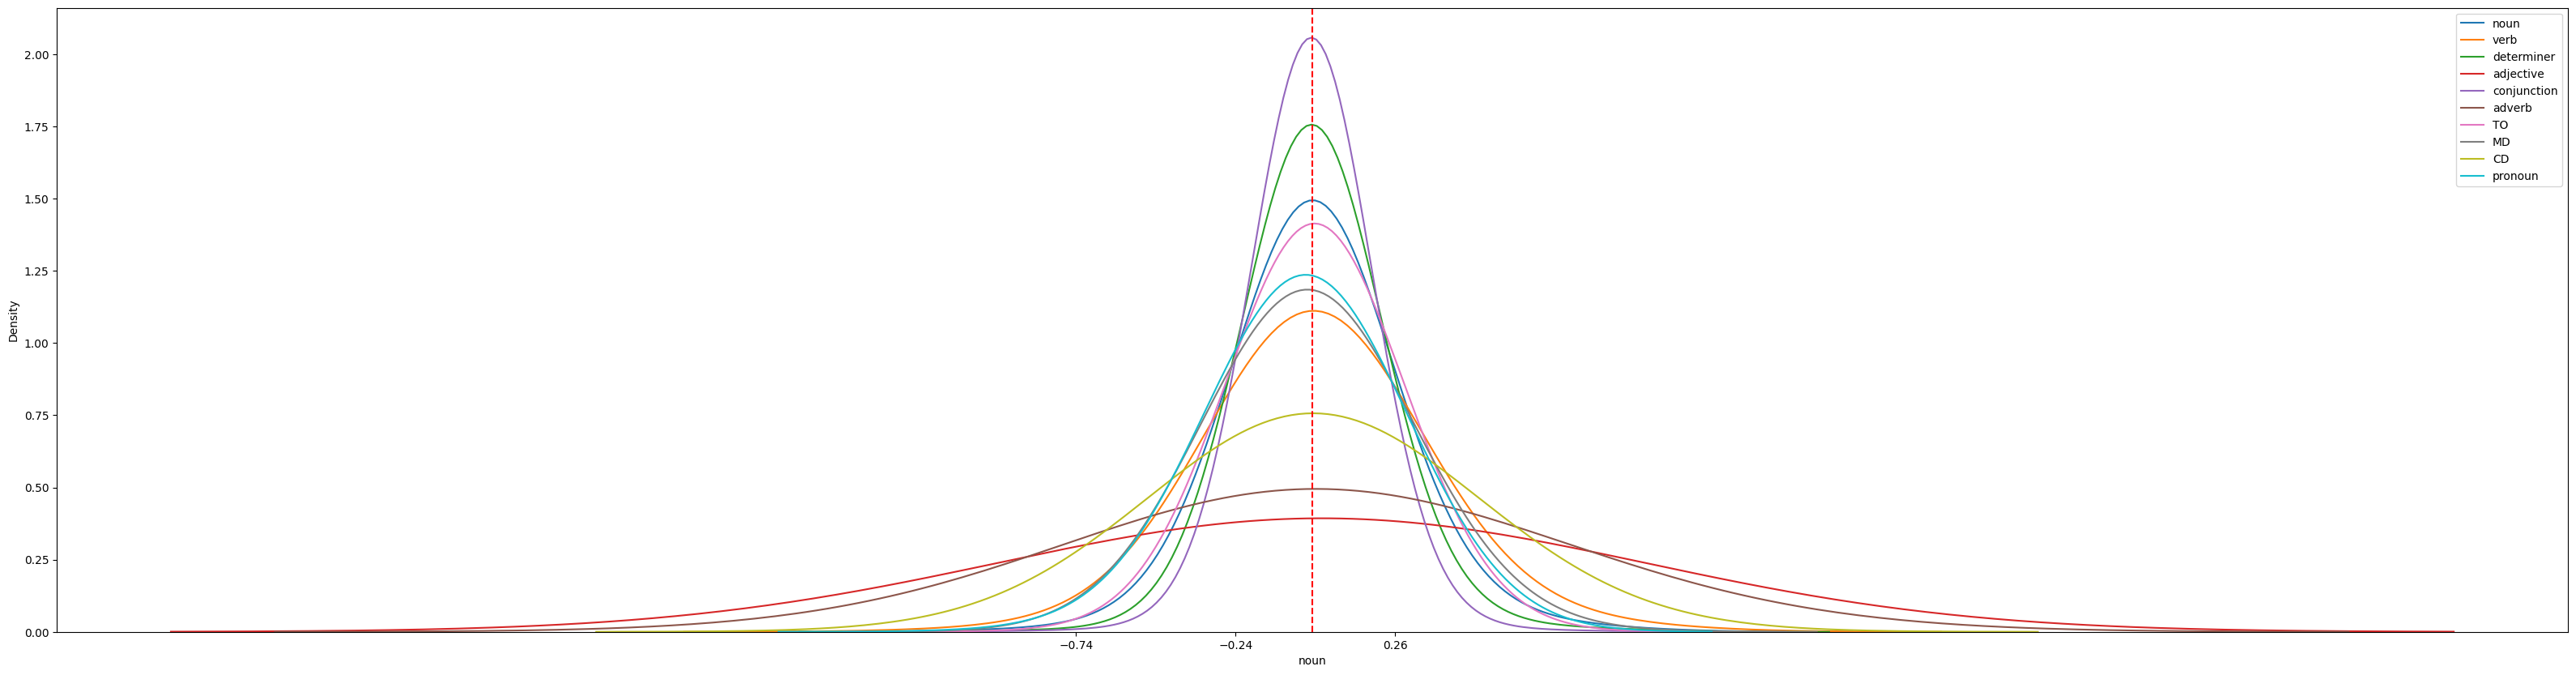

In [71]:
get_all_df(comment_df)

In [72]:
def get_all_colunm_df(df):
    unique_values = df['Tag'].value_counts().index
    result = pd.DataFrame()

    for uniq in unique_values:
        attr = get_list_print_df(df, uniq)
        result = pd.concat([result, attr], axis=1)
    
    column_order = ['noun','verb','adjective', 'adverb','conjunction','determiner','pronoun','TO','MD','CD']
    # 重新排序列名
    result = result[column_order]
    
    return result 

In [73]:
comment_df_all_type = get_all_colunm_df(comment_df)
comment_df_all_type.head()

,noun,verb,determiner,adjective,conjunction,adverb,TO,MD,CD,pronoun
0,0.985701,0.113493,-0.003411,0.135033,0.033321,0.038614,-0.106894,0.084875,-0.003428,-0.080639
1,-0.015687,0.023074,0.020295,0.008980,0.010198,-0.033471,-0.010485,-0.003321,0.066271,0.032898
2,0.024190,0.037202,-0.074279,0.016497,-0.006324,0.124208,0.019873,0.249526,-0.029384,-0.007272
3,0.018128,-0.126984,-0.019286,-0.040259,-0.013625,0.001736,-0.028003,0.004952,-0.012054,-0.008950
4,-0.955500,0.073648,0.014317,-0.025252,-0.009220,-0.014542,0.004635,0.119764,-0.010837,-0.003129


In [74]:
abs_df = comment_df_all_type.abs()
mean_abs_values = abs_df.mean()
mean_abs_values

noun           0.102306
verb           0.110170
determiner     0.063937
adjective      0.384341
conjunction    0.060540
adverb         0.169357
TO             0.069872
MD             0.072706
CD             0.099609
pronoun        0.056662
dtype: float64

In [75]:
mean_value = comment_df_all_type.mean()
mean_value 

noun           0.009391
verb           0.012753
determiner     0.005649
adjective      0.026159
conjunction   -0.002816
adverb         0.020476
TO             0.007875
MD            -0.011860
CD             0.004987
pronoun       -0.026732
dtype: float64

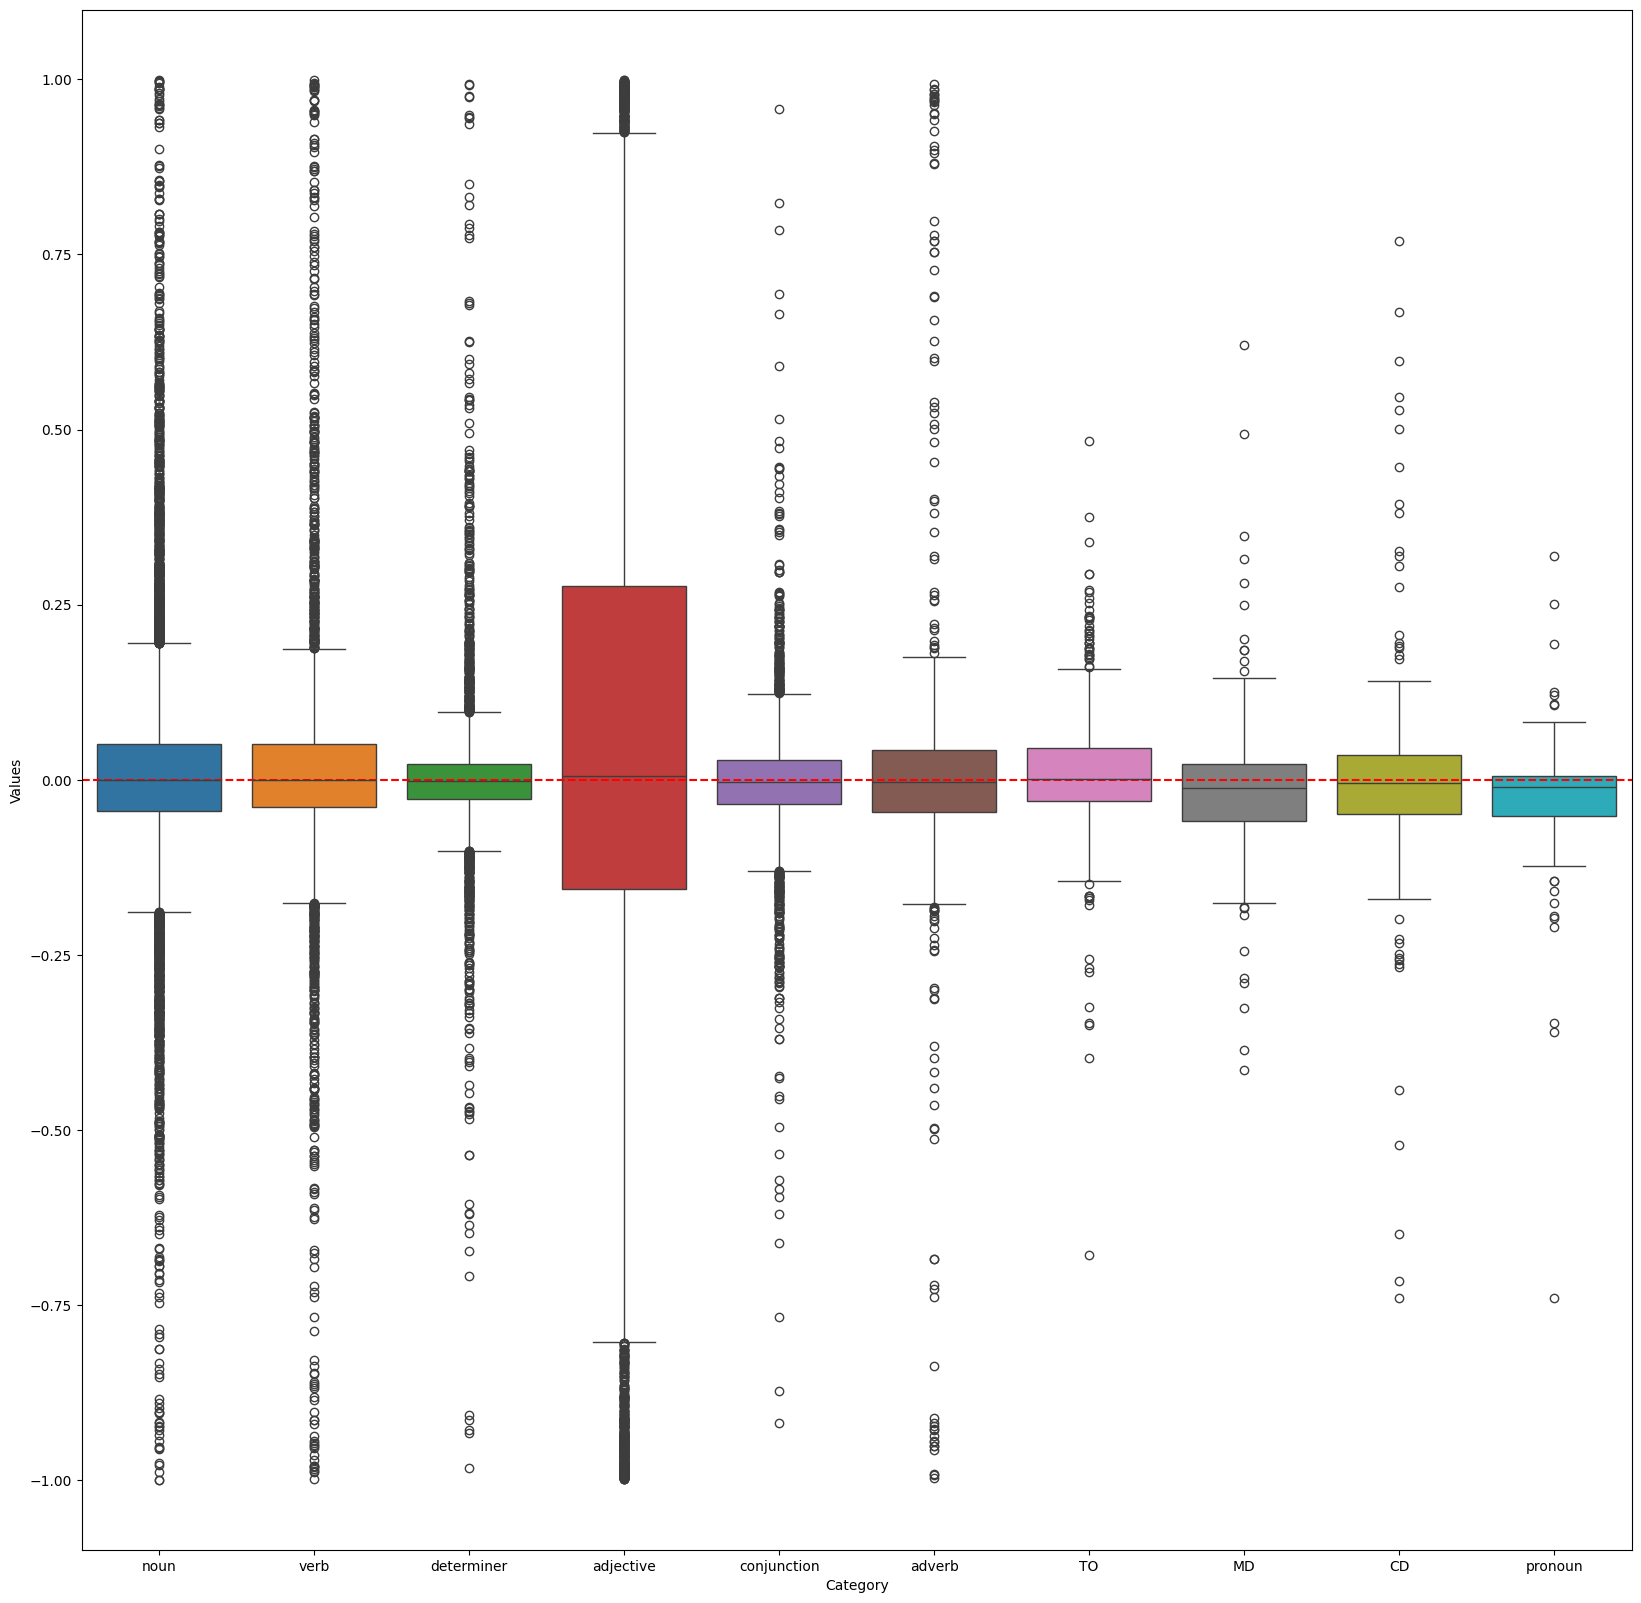

In [76]:
# 绘制箱线图
plt.figure(figsize=(20, 20))
sns.boxplot(data=comment_df_all_type)

plt.xlabel('Category')
plt.ylabel('Values')

plt.axhline(y=0, color='r', linestyle='--')
plt.show()

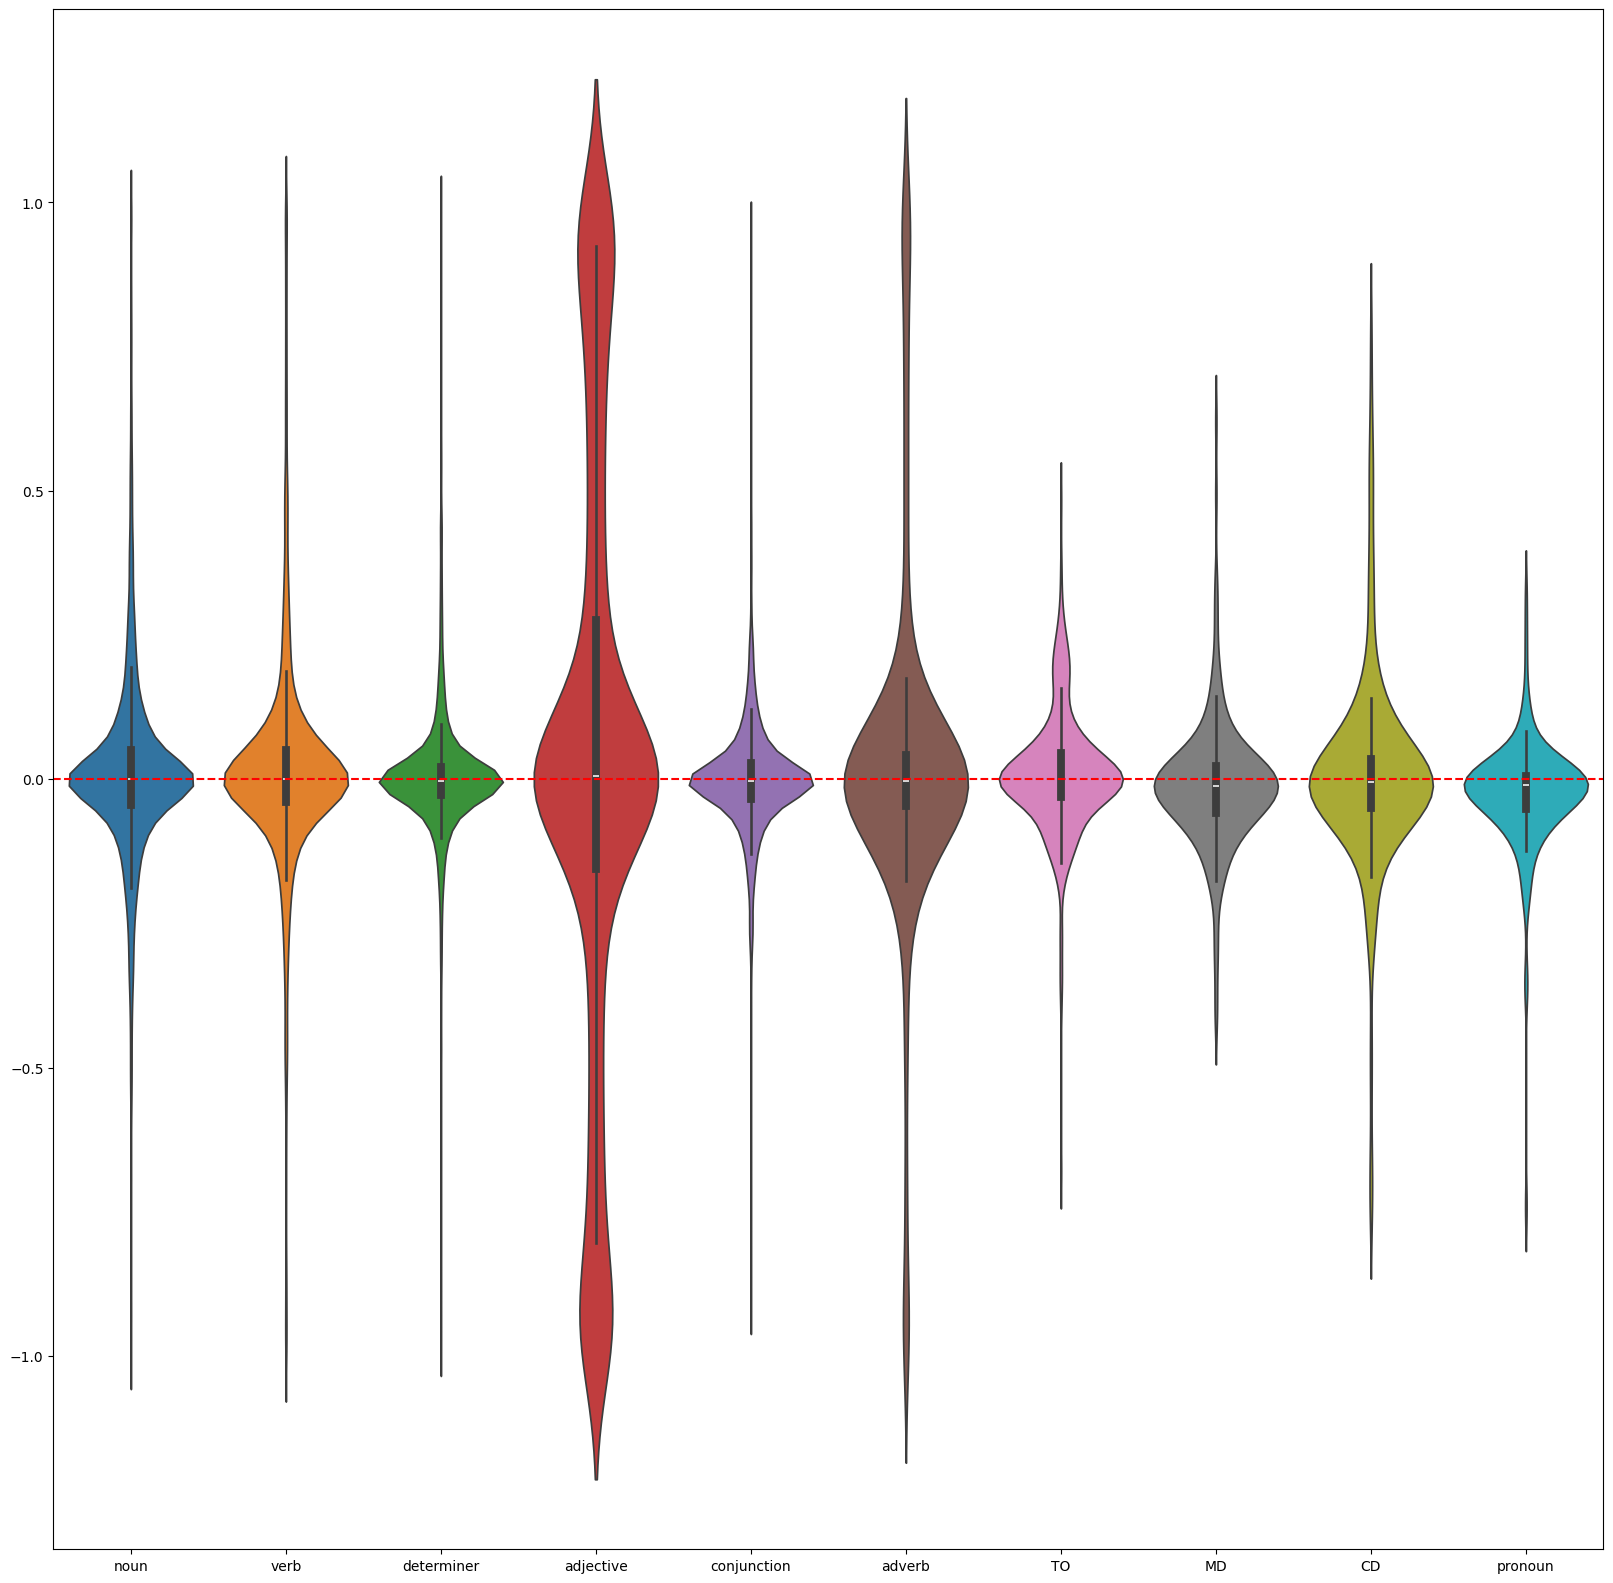

In [77]:
# 数据 x 10  小提琴图
plt.figure(figsize=(20,20))
sns.violinplot(data=comment_df_all_type)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [78]:
# 画出和论文一样的图
def get_paper_picture(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(30, 8))

    # 定义颜色
    palette = sns.color_palette('pastel')

    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print(mean_value)
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='blue', linestyle='--', linewidth=2)



    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()


noun           0.009391
verb           0.012753
determiner     0.005649
adjective      0.026159
conjunction   -0.002816
adverb         0.020476
TO             0.007875
MD            -0.011860
CD             0.004987
pronoun       -0.026732
dtype: float64


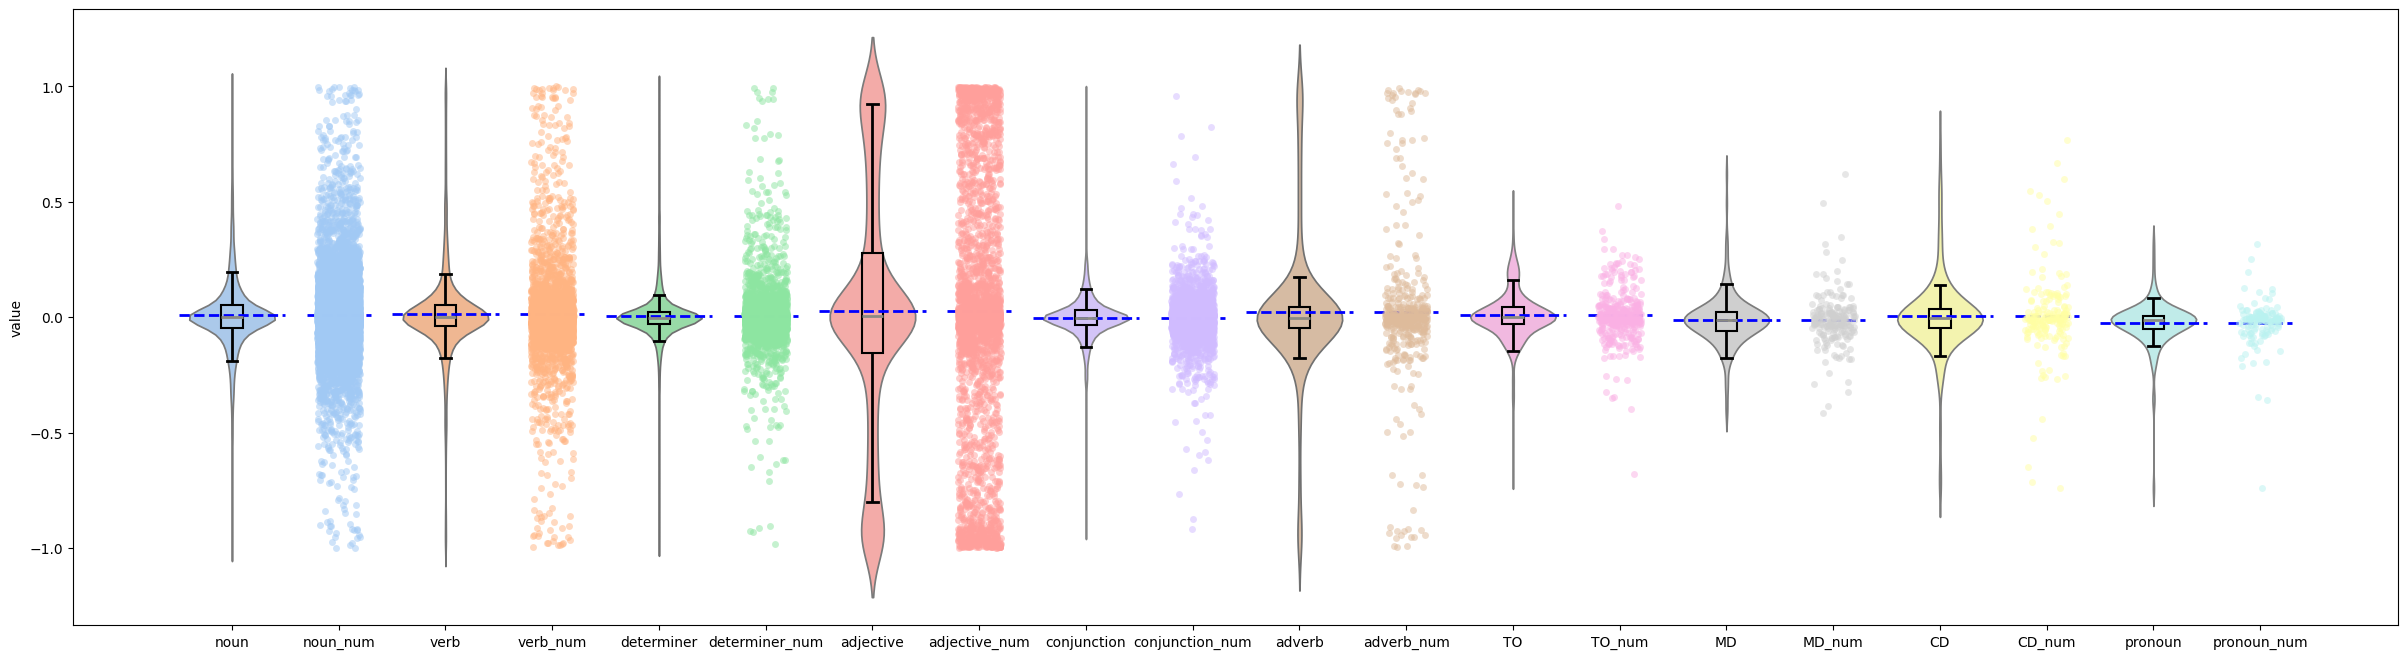

In [79]:
get_paper_picture(comment_df_all_type)

In [92]:
for column_name in comment_df_all_type.select_dtypes(include=[np.number]).columns:
    # 使用dropna()方法排除NaN值
    non_nan_count = len(comment_df_all_type[column_name].dropna())
    print(column_name)
    print(non_nan_count)

noun
8722
verb
3464
determiner
3152
adjective
3116
conjunction
2559
adverb
471
TO
390
MD
198
CD
197
pronoun
132


In [91]:
for column_name in comment_df_all_type.select_dtypes(include=[np.number]).columns:
    print(len(comment_df_all_type[column_name]))

8722
8722
8722
8722
8722
8722
8722
8722
8722
8722


In [80]:
# 定义词性标签集合: 名词  动词  形容词 副词 连词 限定词 代词
comment_df_all_type_abs = comment_df_all_type.abs()
comment_df_all_type_abs.head()

,noun,verb,determiner,adjective,conjunction,adverb,TO,MD,CD,pronoun
0,0.985701,0.113493,0.003411,0.135033,0.033321,0.038614,0.106894,0.084875,0.003428,0.080639
1,0.015687,0.023074,0.020295,0.008980,0.010198,0.033471,0.010485,0.003321,0.066271,0.032898
2,0.024190,0.037202,0.074279,0.016497,0.006324,0.124208,0.019873,0.249526,0.029384,0.007272
3,0.018128,0.126984,0.019286,0.040259,0.013625,0.001736,0.028003,0.004952,0.012054,0.008950
4,0.955500,0.073648,0.014317,0.025252,0.009220,0.014542,0.004635,0.119764,0.010837,0.003129


noun           0.102306
verb           0.110170
determiner     0.063937
adjective      0.384341
conjunction    0.060540
adverb         0.169357
TO             0.069872
MD             0.072706
CD             0.099609
pronoun        0.056662
dtype: float64


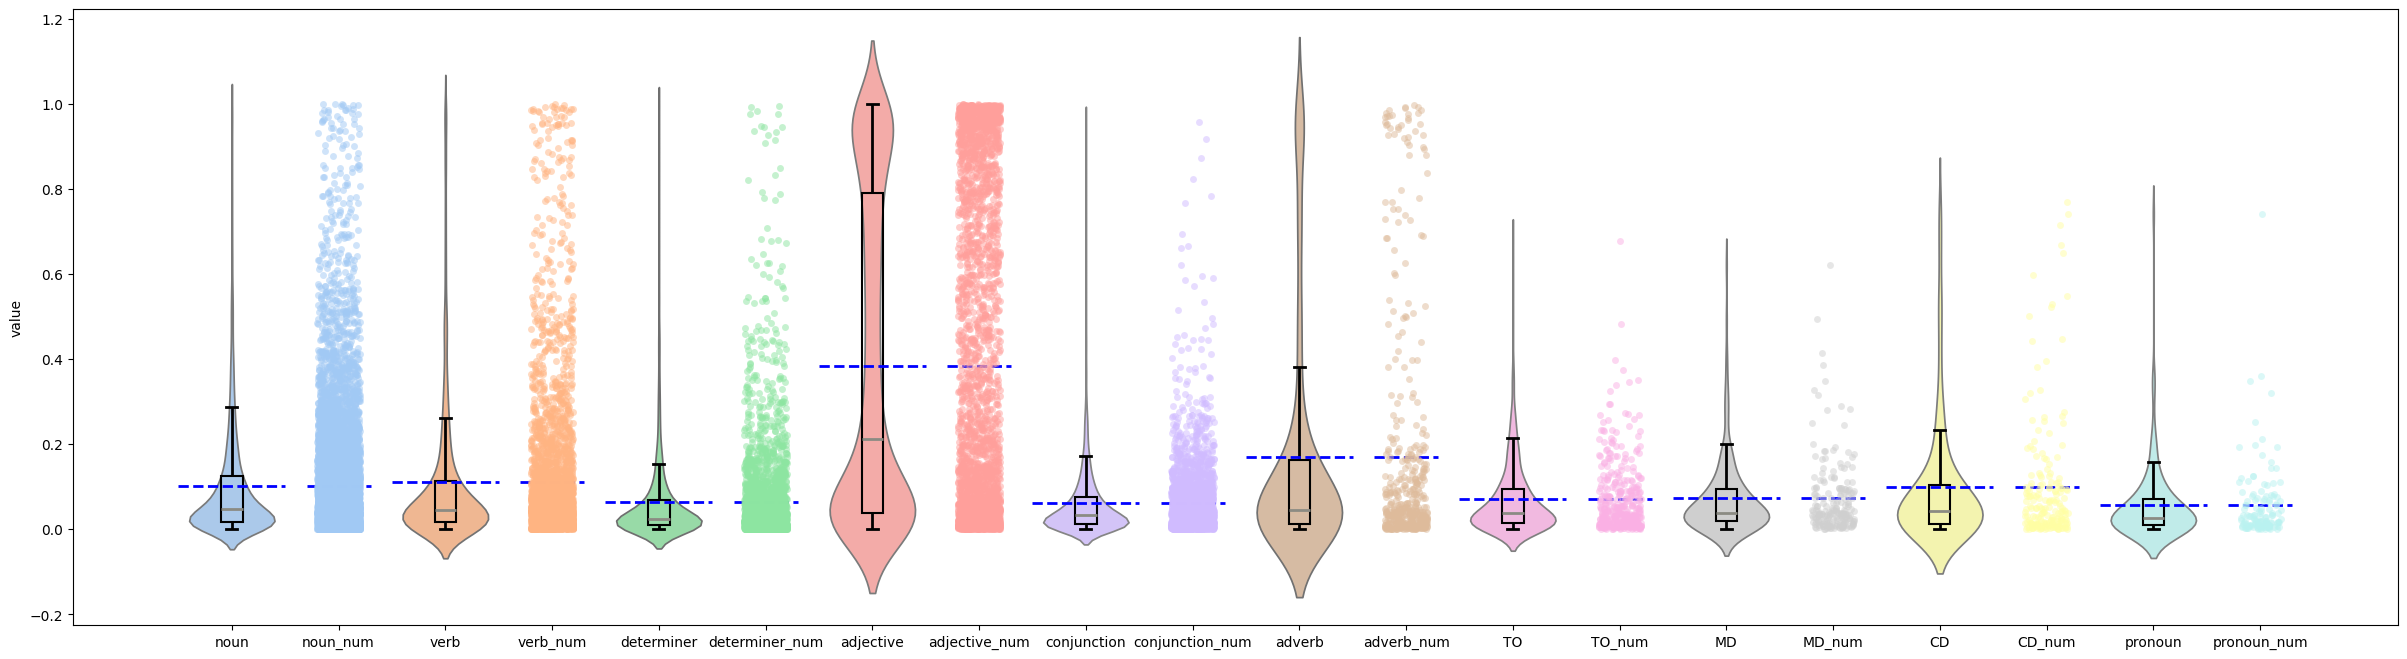

In [81]:
# 定义词性标签集合: 名词  动词  形容词 副词 连词 限定词 代词

get_paper_picture(comment_df_all_type_abs)

列 noun 的第1个分位数: -0.23659261744776613 	第99个分位数: 0.29526328841108296	此列删除数量874
列 verb 的第1个分位数: -0.24365179243060134 	第99个分位数: 0.3384213394639861	此列删除数量348
列 determiner 的第1个分位数: -0.13363379645175252 	第99个分位数: 0.18215391464634806	此列删除数量316
列 adjective 的第1个分位数: -0.9562679097785864 	第99个分位数: 0.9634478001131881	此列删除数量312
列 conjunction 的第1个分位数: -0.1513711554488628 	第99个分位数: 0.14680457926293689	此列删除数量256
列 adverb 的第1个分位数: -0.4525879256196731 	第99个分位数: 0.7689589782937764	此列删除数量48
列 TO 的第1个分位数: -0.13107130623312382 	第99个分位数: 0.20784249018885076	此列删除数量40
列 MD 的第1个分位数: -0.17291484773067933 	第99个分位数: 0.1574864619632197	此列删除数量20
列 CD 的第1个分位数: -0.23633663279348147 	第99个分位数: 0.3212136064457171	此列删除数量20
列 pronoun 的第1个分位数: -0.16636770603599943 	第99个分位数: 0.09359680077253732	此列删除数量14
所有列的总共删除的数量: 2248
noun           0.004895
verb           0.007359
determiner    -0.000051
adjective      0.028940
conjunction   -0.002928
adverb         0.016541
TO             0.007177
MD            -0.015268
CD             0

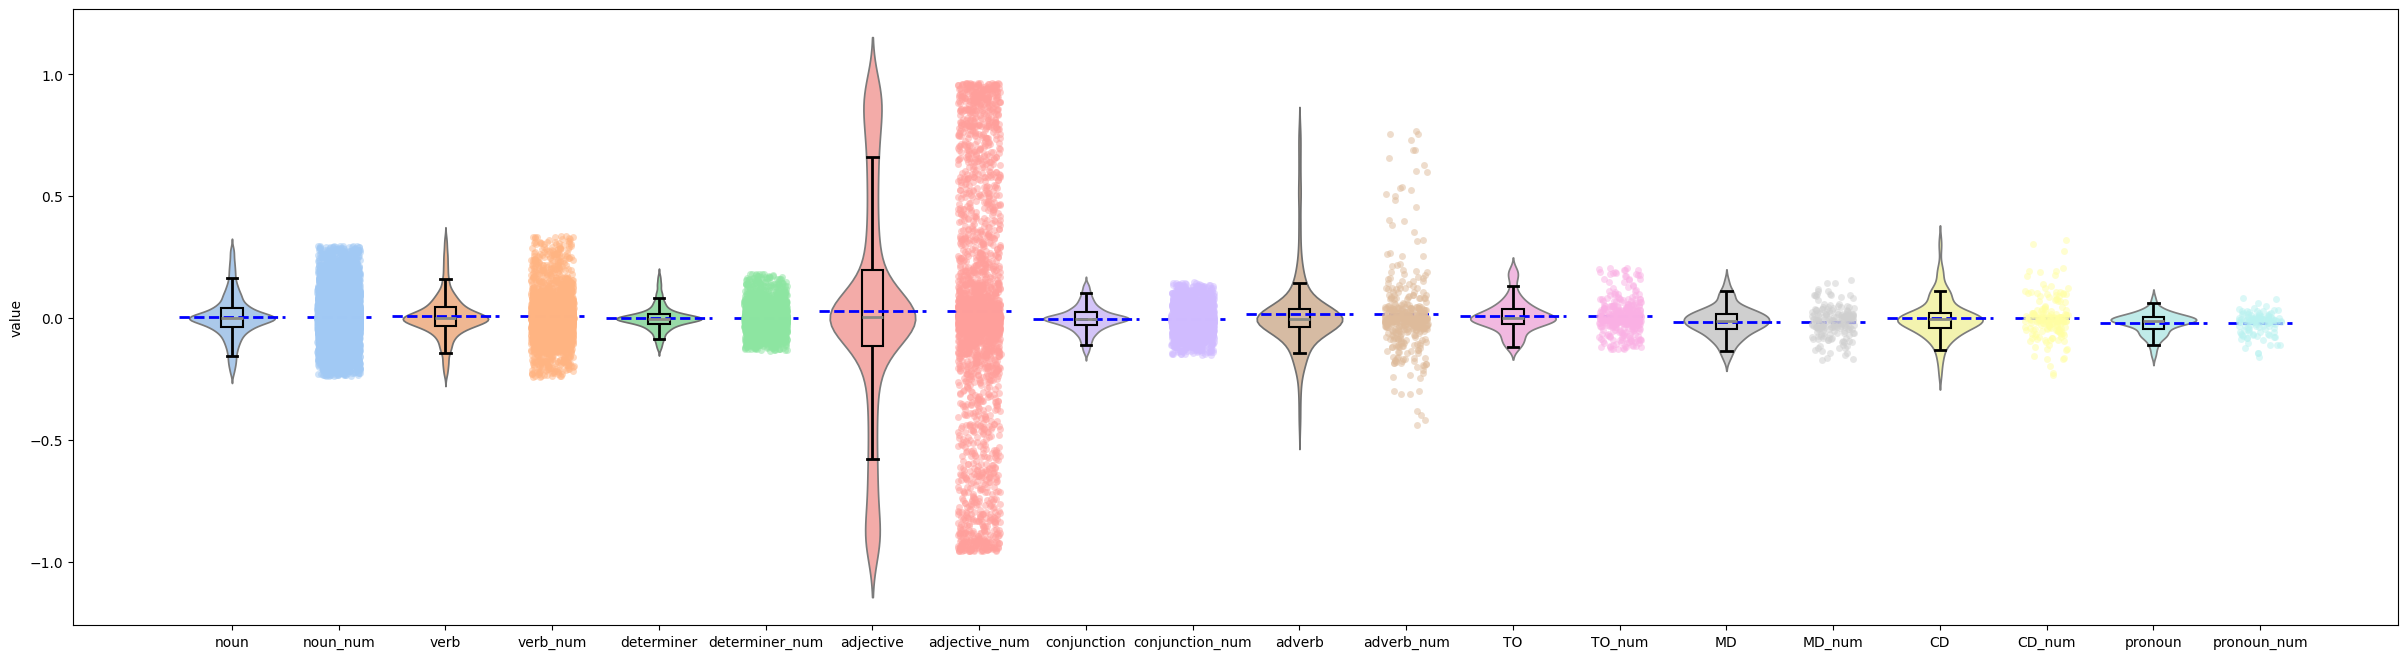

In [82]:
# 截尾处理 5%

def Winsorization_outliers_2(df):
    total_nan_count_new = 0  # 初始化总共删除的数量

    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = np.percentile(df[column_name].dropna(), 5)
        q3 = np.percentile(df[column_name].dropna(), 95)
        
        # 计算替换前的NaN数量
        nan_count_before = df[column_name].isna().sum()

        df[column_name] = df[column_name].apply(lambda x: np.nan if x < q1 or x > q3 else x)
        
        # 计算替换后的NaN数量
        nan_count_after = df[column_name].isna().sum()
        
        nan_count_new = nan_count_after - nan_count_before
               
        total_nan_count_new += nan_count_new    # 总共删除的数量
        
        print(f'列 {column_name} 的第1个分位数: {q1} \t第99个分位数: {q3}\t此列删除数量{nan_count_new}')
    print(f'所有列的总共删除的数量: {total_nan_count_new}')
    return df

all_colunm_df_true_for_Winsorization_5 = comment_df_all_type.copy()
all_colunm_df_true_Winsorization_5 = Winsorization_outliers_2(all_colunm_df_true_for_Winsorization_5)

get_paper_picture(all_colunm_df_true_Winsorization_5)

noun           0.063142
verb           0.061184
determiner     0.034354
adjective      0.317887
conjunction    0.038600
adverb         0.089453
TO             0.049057
MD             0.048704
CD             0.057079
pronoun        0.034143
dtype: float64


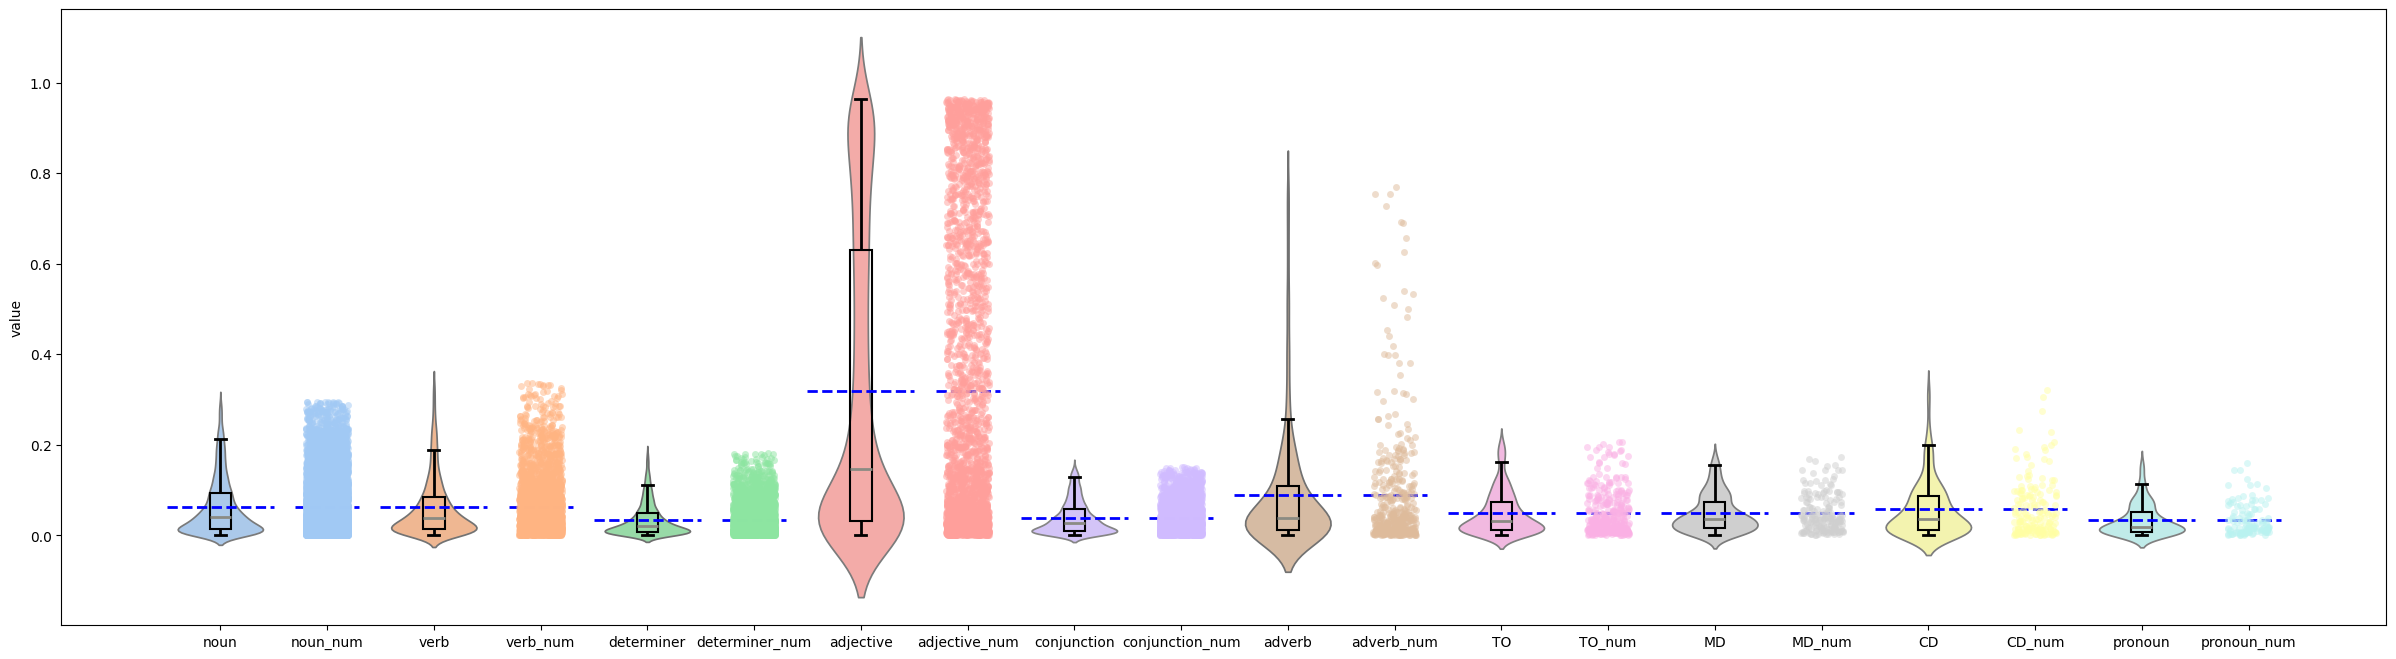

In [83]:
all_colunm_df_Winsorization_true_5_abs = all_colunm_df_true_Winsorization_5.abs()
get_paper_picture(all_colunm_df_Winsorization_true_5_abs)

下四分位数: -0.045236541380199696, 上四分位数: 0.05066906576066467, 最小值下界: -0.18909495209149624, 最大值上界: 0.19452747647196122	此列删除数量1369
下四分位数: -0.03961673235102054, 上四分位数: 0.05101148308651683, 最小值下界: -0.1755590555073266, 最大值上界: 0.18695380624282287	此列删除数量588
下四分位数: -0.027626647625236107, 上四分位数: 0.021981414446269092, 最小值下界: -0.1020387407324939, 最大值上界: 0.0963935075535269	此列删除数量540
下四分位数: -0.1555254975652154, 上四分位数: 0.276531940770548, 最小值下界: -0.8036116550688605, 最大值上界: 0.9246180982741931	此列删除数量597
下四分位数: -0.034789163027444336, 上四分位数: 0.02872960411745619, 最小值下界: -0.13006731374479513, 最大值上界: 0.12400775483480699	此列删除数量331
下四分位数: -0.0466097685700387, 上四分位数: 0.04280045351165476, 最小值下界: -0.1807251016925789, 最大值上界: 0.17691578663419497	此列删除数量105
下四分位数: -0.03105266037101773, 上四分位数: 0.045190500054907774, 最小值下界: -0.145417401009906, 最大值上界: 0.15955524069379604	此列删除数量53
下四分位数: -0.0588401353249942, 上四分位数: 0.02291754265816035, 最小值下界: -0.18147665229972604, 最大值上界: 0.1455540596328922	此列删除数量20
下四分位数: -0.0492688453403963

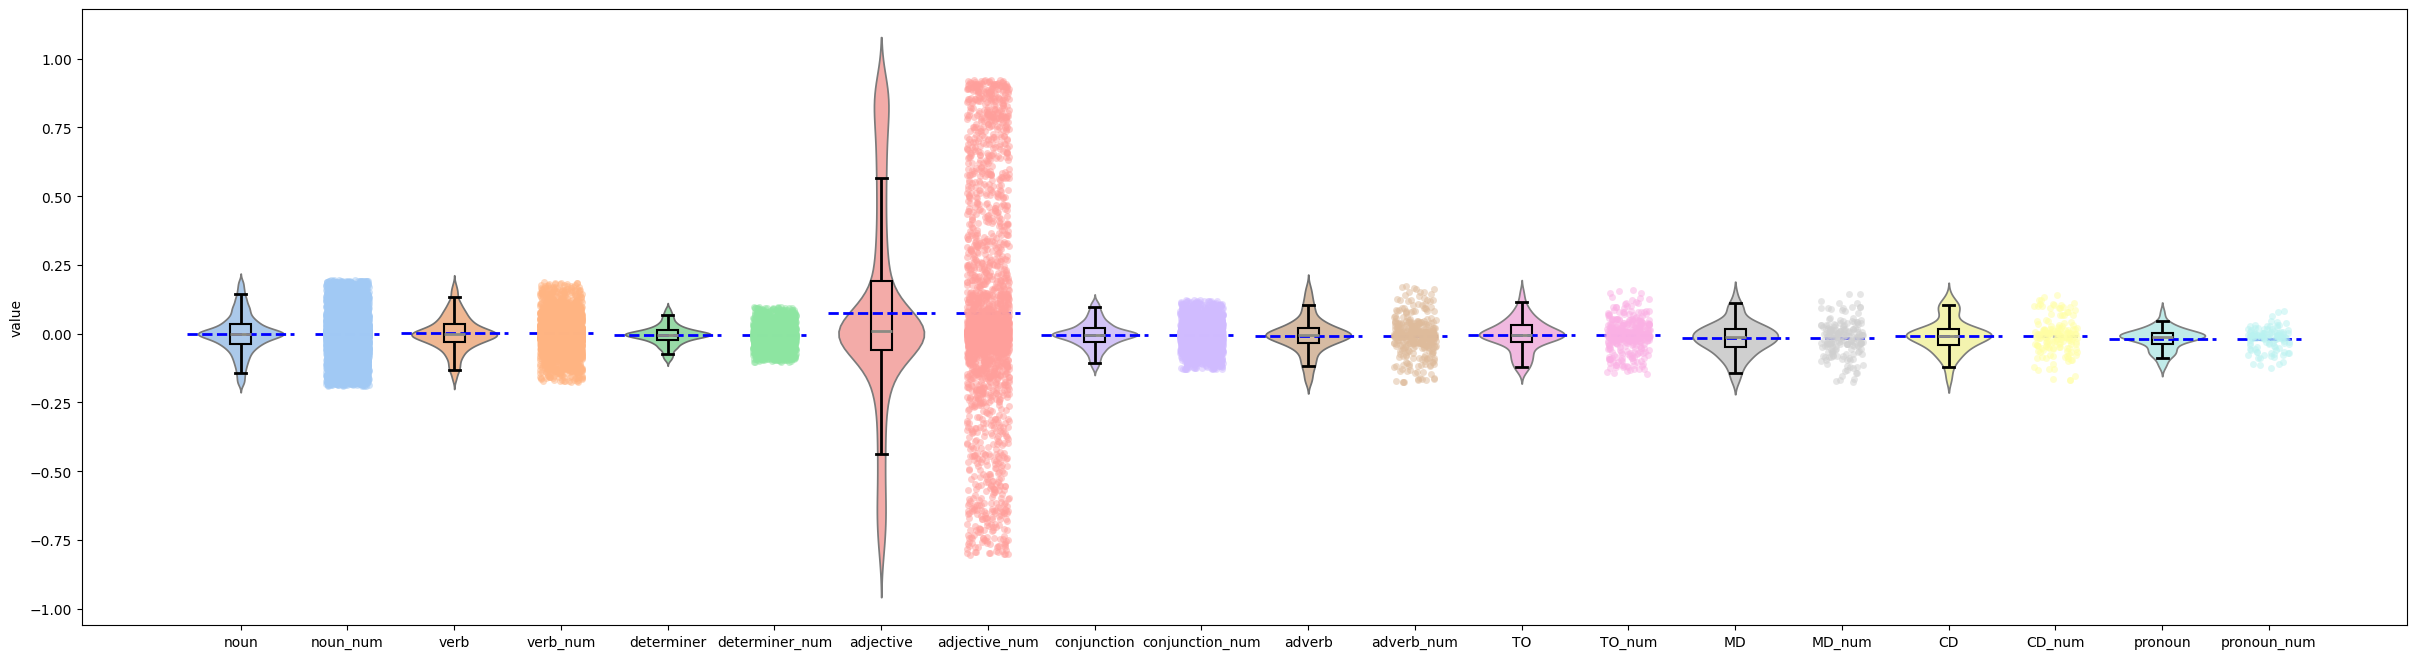

In [84]:
# 四分位距法
def iqr_outliers(df):
    total_nan_count_new = 0  # 初始化总共删除的数量

    for column_name in df.select_dtypes(include=[np.number]).columns:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        
        # 计算替换前的NaN数量
        nan_count_before = df[column_name].isna().sum()

        df[column_name] = df[column_name].apply(lambda x: np.nan if x < Lower_tail or x > Upper_tail else x)
        
        # 计算替换后的NaN数量
        nan_count_after = df[column_name].isna().sum()
        
        nan_count_new = nan_count_after - nan_count_before
               
        total_nan_count_new += nan_count_new    # 总共删除的数量
        print(f'下四分位数: {q1}, 上四分位数: {q3}, 最小值下界: {Lower_tail}, 最大值上界: {Upper_tail}\t此列删除数量{nan_count_new}')
    print(f'所有列的总共删除的数量: {total_nan_count_new}')
    return df

all_colunm_df_true_for_iqr = comment_df_all_type.copy()
all_colunm_df_true_iqr = iqr_outliers(all_colunm_df_true_for_iqr)

get_paper_picture(all_colunm_df_true_iqr)

In [85]:
all_colunm_df_iqr_true_abs = all_colunm_df_true_iqr.abs()
all_colunm_df_iqr_true_abs.head()

,noun,verb,determiner,adjective,conjunction,adverb,TO,MD,CD,pronoun
0,NaN,0.113493,0.003411,0.135033,0.033321,0.038614,0.106894,0.084875,0.003428,0.080639
1,0.015687,0.023074,0.020295,0.008980,0.010198,0.033471,0.010485,0.003321,0.066271,0.032898
2,0.024190,0.037202,0.074279,0.016497,0.006324,0.124208,0.019873,NaN,0.029384,0.007272
3,0.018128,0.126984,0.019286,0.040259,0.013625,0.001736,0.028003,0.004952,0.012054,0.008950
4,NaN,0.073648,0.014317,0.025252,0.009220,0.014542,0.004635,0.119764,0.010837,0.003129


noun           0.051950
verb           0.046784
determiner     0.026464
adjective      0.250716
conjunction    0.035323
adverb         0.046155
TO             0.043163
MD             0.048820
CD             0.044934
pronoun        0.031135
dtype: float64


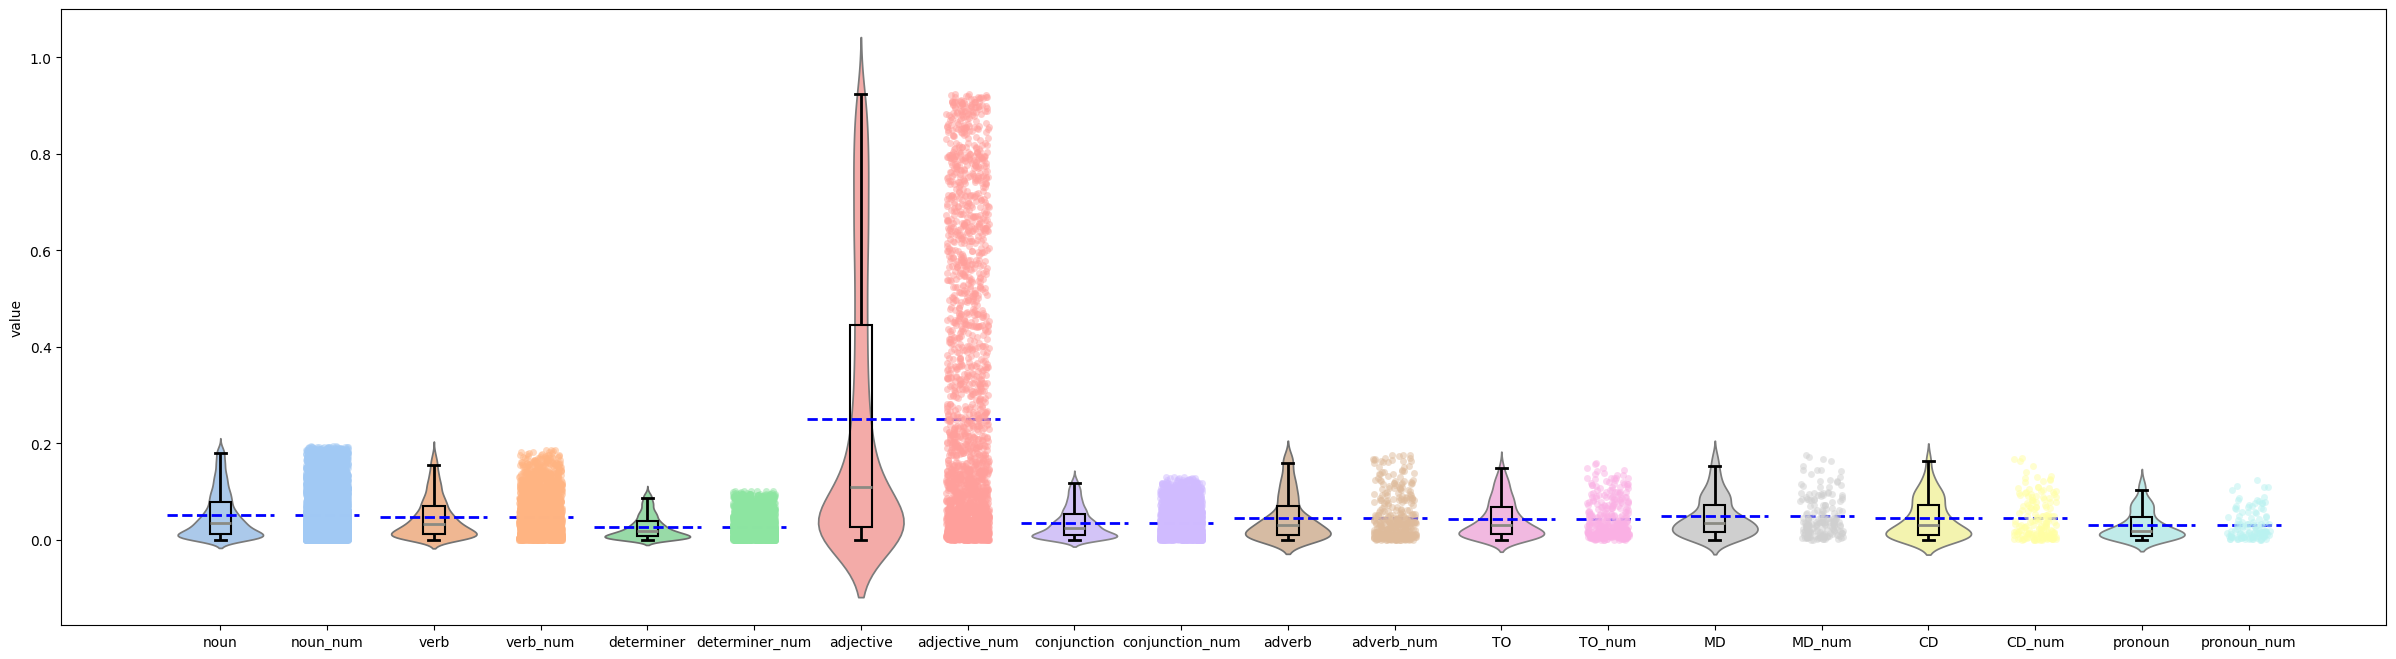

In [86]:
get_paper_picture(all_colunm_df_iqr_true_abs)

In [87]:
# 画出和论文一样的图
def get_paper_picture_other_color(df):
    
    # 图形大小，随时改
    plt.figure(figsize=(30, 8))

    # 使用 'viridis' colormap
    colormap = plt.colormaps['viridis']
    palette = [colormap(i) for i in np.linspace(0, 1, len(df.columns))]
    
    # 画图
    for i, col in enumerate(df.columns):
        # 小提琴
        sns.violinplot(x=np.full(len(df), i), y=df[col], inner=None, hue=np.full(len(df), i), palette=[palette[i]], legend=False)
        # 散点图
        sns.stripplot(x=np.full(len(df), i) - 0.5, y=df[col], color=palette[i], alpha=0.5, jitter=0.2, legend=False)
        # 箱线图
        sns.boxplot(x=np.full(len(df), i), y=df[col], width=0.2, showcaps=True, showfliers=False,  # 不显示异常值
                    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),  # 更改边框线条粗细
                    whiskerprops=dict(color='black', linewidth=2), 
                    capprops=dict(color='black', linewidth=2), 
                    medianprops=dict(color='#8B8B83', linewidth=2), 
                    flierprops=dict(marker='o', color='red', alpha=0.5))
    # 均值线
    mean_value = df.mean()
    print(mean_value)
    new_mean_value = [item for item in mean_value for _ in range(2)]
    for i in range(len(new_mean_value)):
        if i % 2 == 0:
            plt.plot([i - 0.5, i + 0.5], [new_mean_value[i], new_mean_value[i]], color='#FF00FF', linestyle='--', linewidth=2)
        else:
            plt.plot([i - 0.3, i + 0.3], [new_mean_value[i], new_mean_value[i]], color='#FF00FF', linestyle='--', linewidth=2)



    # 横坐标标签
    label_name = [item for sublist in [[x, f'{x}_num'] for x in df.columns] for item in sublist]
    ax = plt.gca()
    ax.set_xticks(np.arange(len(label_name)))  # 设置标签的位置
    ax.set_xticklabels(label_name)

    plt.ylabel('value')

    plt.show()


noun           0.009391
verb           0.012753
determiner     0.005649
adjective      0.026159
conjunction   -0.002816
adverb         0.020476
TO             0.007875
MD            -0.011860
CD             0.004987
pronoun       -0.026732
dtype: float64


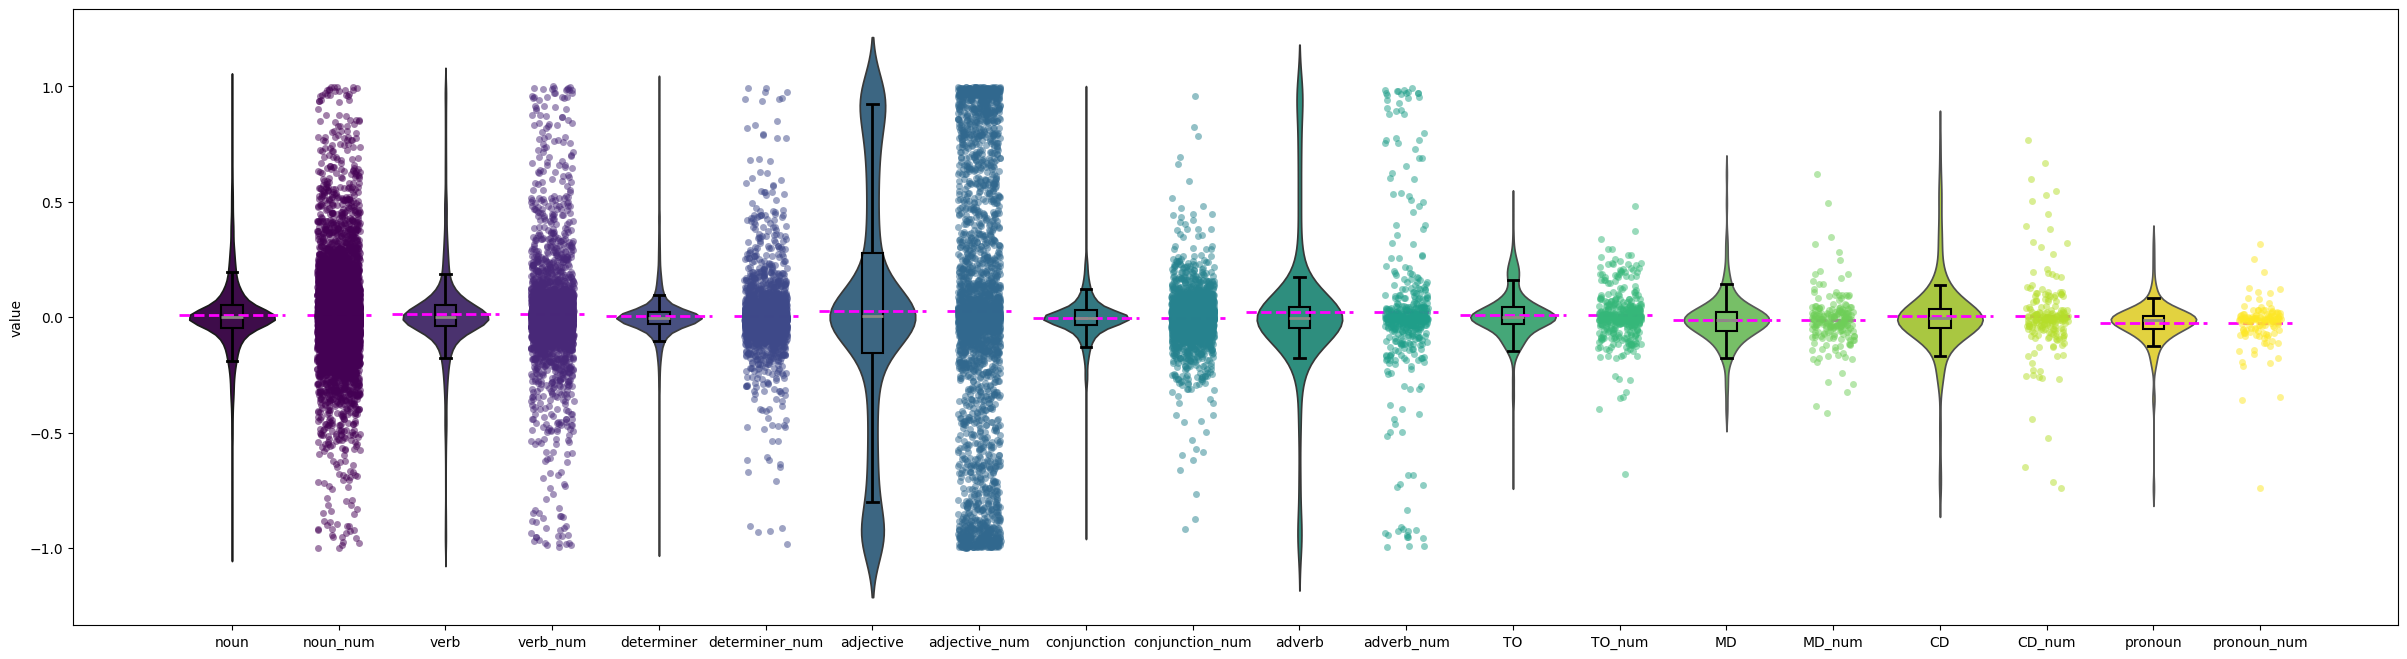

In [88]:
# 原数据  * 100  ，按照道理数据分布应不会变
comment_df_all_type_copy = comment_df_all_type.copy()
get_paper_picture_other_color(comment_df_all_type_copy)